<a href="https://colab.research.google.com/github/Uma1709/finalyear_project/blob/main/Final_project_code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib scikit-image torch torchvision torch-geometric opencv-python pandas tqdm scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 823.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
# Install required packages (run once)
!pip install numpy matplotlib scikit-image torch torchvision torch-geometric opencv-python pandas tqdm

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Select and upload your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"umameera","key":"3497f86ef86fceb3e0abacaaf9752970"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/leukemia-classification


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/leukemia-classification
License(s): other


In [ ]:
!unzip leukemia-classification.zip -d leukemia_data


Streaming output truncated to the last 5000 lines.
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_5_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_6_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_7_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_1_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_2_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_3_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_1_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_2_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_3_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_4_all.bmp  
  inflating: leukemia_data/C-NMC_Leukemia/training_data/fol

In [ ]:
import os
import cv2
import numpy as np

# Define Paths
TRAIN_PATH = "/content/leukemia_data/C-NMC_Leukemia/training_data"

# Initialize empty lists for storing images & labels
train_images = []
train_labels = []

# Iterate over all training folds
for fold in ["fold_0", "fold_1", "fold_2"]:
    fold_path = os.path.join(TRAIN_PATH, fold)

    for subfolder in ["all", "hem"]:  # Two classes: "all" (cancerous) and "hem" (healthy)
        class_path = os.path.join(fold_path, subfolder)

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Read Image in Grayscale (Medical images don't need RGB)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"⚠️ Warning: Skipped {filename} (failed to load)")
                continue  # Skip unreadable images

            # Store the image and corresponding label
            train_images.append(img)
            train_labels.append(0 if subfolder == "hem" else 1)  # 0 = Healthy, 1 = Cancerous

print(f"✅ Loaded {len(train_images)} training images")


✅ Loaded 10661 training images


# Resize all images


In [ ]:
# Resize all images to 256x256
resized_images = [cv2.resize(img, (256, 256)) for img in train_images]

print(f"✅ Resized {len(resized_images)} images to 256x256")


✅ Resized 10661 images to 256x256


# Convert images to float and normalize pixel values to range [0,1]

In [ ]:
# Convert images to float and normalize pixel values to range [0,1]
normalized_images = [img.astype(np.float32) / 255.0 for img in resized_images]

print(f"✅ Normalized {len(normalized_images)} images")


✅ Normalized 10661 images


# Apply Gaussian blur for noise reduction

In [ ]:
# Apply Gaussian blur for noise reduction
denoised_images = [cv2.GaussianBlur(img, (5,5), 0) for img in normalized_images]

print(f"✅ Applied Gaussian blur to {len(denoised_images)} images")


✅ Applied Gaussian blur to 10661 images


#preprocessed images

In [ ]:
import os
import cv2
import numpy as np

# Set dataset path
TRAIN_PATH = "/content/leukemia_data/C-NMC_Leukemia/training_data"

# Initialize empty list to store preprocessed images
preprocessed_images = []

# Iterate through training folds
for fold in ["fold_0", "fold_1", "fold_2"]:
    fold_path = os.path.join(TRAIN_PATH, fold)

    for category in ["all", "hem"]:  # 'all' = leukemia, 'hem' = healthy
        category_path = os.path.join(fold_path, category)

        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)

            # Read image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip corrupted images

            # Resize image to 256x256
            img = cv2.resize(img, (256, 256))

            # Normalize pixel values (0 to 1)
            img = img.astype(np.float32) / 255.0

            # Apply Gaussian Blur for noise reduction
            img = cv2.GaussianBlur(img, (5, 5), 0)

            # Append processed image to list
            preprocessed_images.append(img)

print(f"✅ Successfully preprocessed {len(preprocessed_images)} images!")


✅ Successfully preprocessed 10661 images!


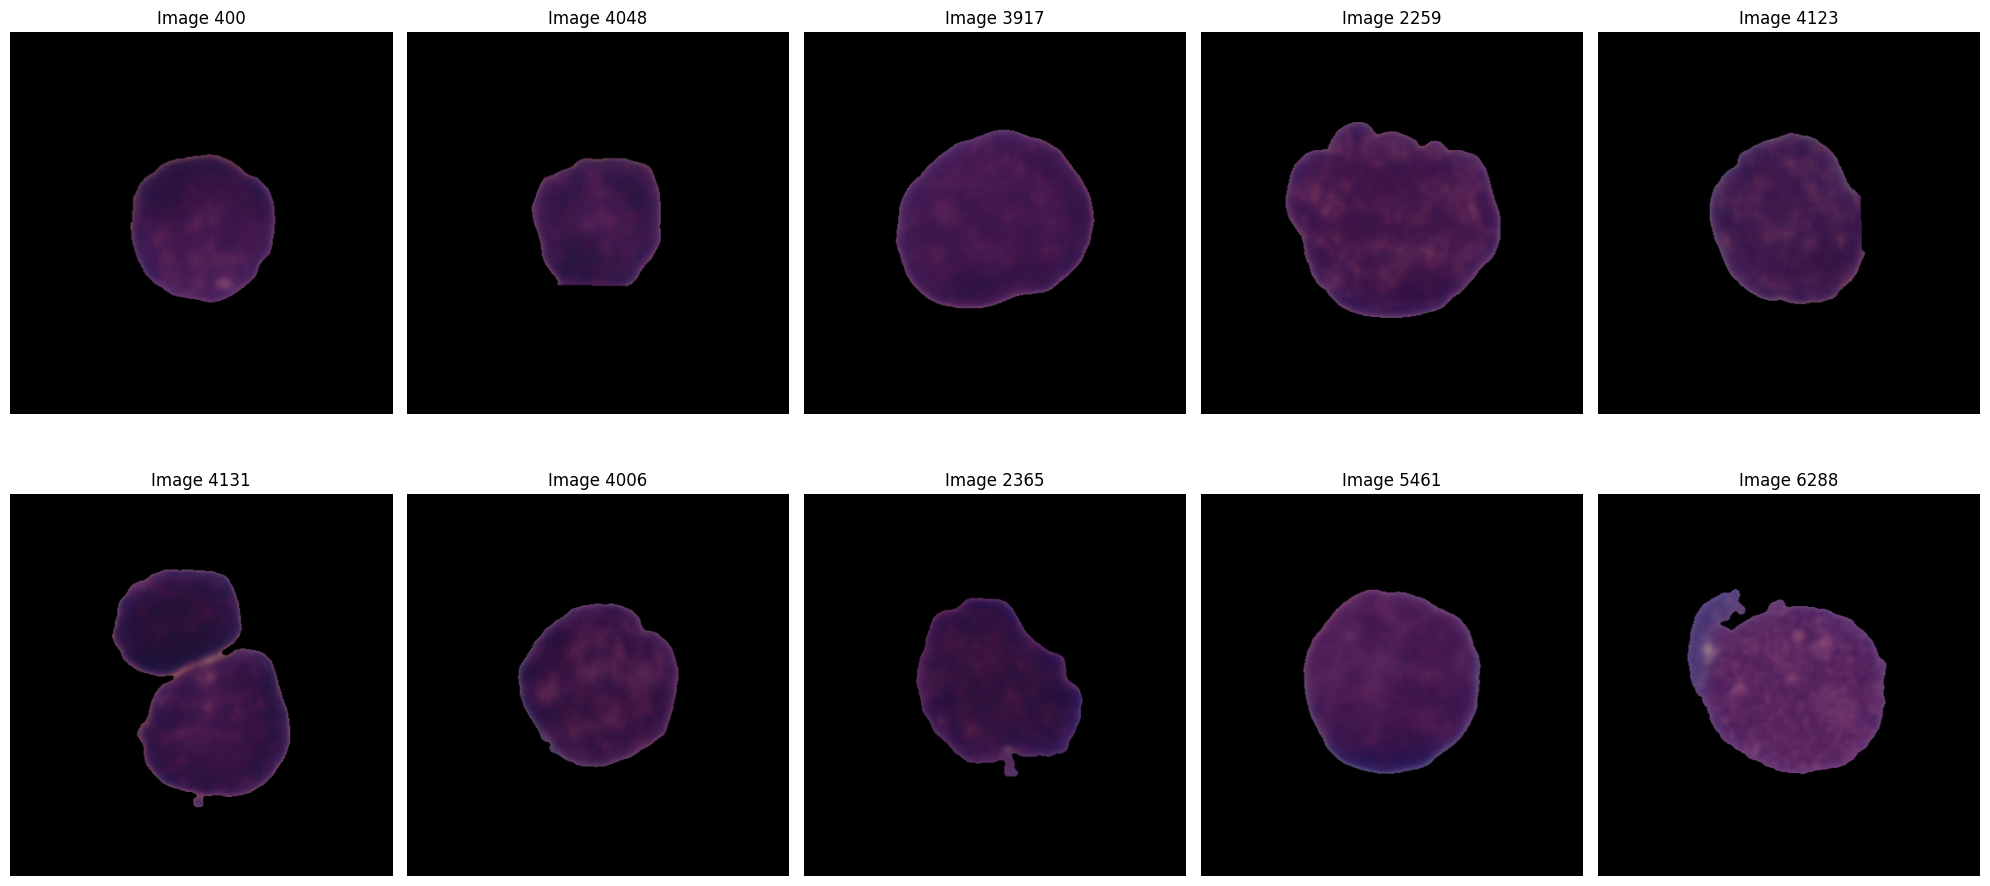

In [ ]:
import matplotlib.pyplot as plt
import random
# Assuming 'preprocessed_images' list is available from the previous code

# Select 10 random images from the preprocessed dataset
num_images_to_display = 10
random_indices = random.sample(range(len(preprocessed_images)), num_images_to_display)

# Display selected images
plt.figure(figsize=(20, 10))  # Adjust figure size for better visualization
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Create subplots in a 2x5 grid
    plt.imshow(preprocessed_images[index], cmap='gray')
    plt.title(f"Image {index}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()


In [ ]:
!pip install scikit-image opencv-python numpy matplotlib



# Apply SLIC for superpixel segmentation

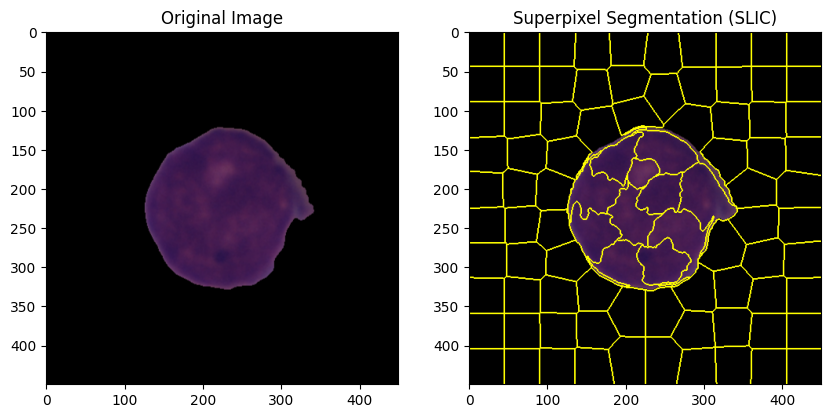

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float

# Define dataset path
TRAIN_PATH = "/content/leukemia_data/C-NMC_Leukemia/training_data"

# Select one image for visualization
sample_image_path = None
for fold in ["fold_0", "fold_1", "fold_2"]:
    for subfolder in ["all", "hem"]:
        folder_path = os.path.join(TRAIN_PATH, fold, subfolder)
        if os.path.exists(folder_path):
            files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]
            if files:
                sample_image_path = os.path.join(folder_path, files[0])  # Take the first image
                break
    if sample_image_path:
        break

# Load image
img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img_float = img_as_float(img)  # Convert to float

# Apply SLIC for superpixel segmentation
num_segments = 100  # Number of superpixels
segments = slic(img_float, n_segments=num_segments, compactness=10, sigma=1)

# Visualize segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(img, segments))
plt.title("Superpixel Segmentation (SLIC)")

plt.show()


In [ ]:
import os

image_folder = "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_0/all"

if not os.path.exists(image_folder):
    print(f"🚨 Folder '{image_folder}' does not exist! Check the path.")
else:
    print(f"✅ Folder '{image_folder}' exists.")


✅ Folder '/content/leukemia_data/C-NMC_Leukemia/training_data/fold_0/all' exists.


In [ ]:
import glob

image_paths = glob.glob(os.path.join(image_folder, "**/*.bmp"), recursive=True)  # Search for BMP images


In [ ]:
import glob
import os

import glob
import os

# ✅ Define Image Folder as a list of strings
image_folders = [
    "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_0",
    "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_1"
]

# ✅ Collect image paths from all folders
image_paths = []
for folder in image_folders:
    image_paths.extend(glob.glob(os.path.join(folder, "**/*.bmp"), recursive=True))
# ✅ Debug: Print Image Paths
if not image_paths:
    raise ValueError(f"🚨 No images found in '{image_folder}'! Check your dataset path.")
else:
    print(f"✅ Found {len(image_paths)} images.")

# ✅ Convert BMP images before processing
from PIL import Image
import numpy as np

def load_and_convert_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Convert BMP to RGB
    return np.array(img)  # Convert to NumPy array for further processing

# ✅ Load all images
preprocessed_images = [load_and_convert_image(img) for img in image_paths]

print(f"✅ Successfully loaded {len(preprocessed_images)} images.")


✅ Found 7108 images.
✅ Successfully loaded 7108 images.


# Images convert into graphs

In [1]:
import os
import torch
import numpy as np
from tqdm import tqdm
from skimage.segmentation import slic
from skimage import graph
from skimage.color import rgb2lab
from skimage.io import imread
from torch_geometric.data import Data
import glob

# === Settings ===
NUM_SUPERPIXELS = 50  # You can change this to 75 or 100 for more detail
graph_save_path = "/content/leukemia_graphs"
os.makedirs(graph_save_path, exist_ok=True)

# === Convert single image to graph ===
def image_to_graph(image, label, num_segments=NUM_SUPERPIXELS):
    # Ensure image is float32
    image = image.astype(np.float32) / 255.0 if image.dtype != np.float32 else image

    # Convert RGB to LAB color space
    lab_image = rgb2lab(image)

    # Superpixel segmentation using SLIC
    segments = slic(lab_image, n_segments=num_segments, compactness=10, sigma=1, start_label=0)

    # Build Region Adjacency Graph (RAG)
    rag = graph.rag_mean_color(lab_image, segments)

    # Node features: mean LAB color in each segment
    node_features = []
    for region in rag.nodes():
        mask = segments == region
        mean_color = lab_image[mask].mean(axis=0)  # [L, A, B]
        node_features.append(mean_color)

    x = torch.tensor(node_features, dtype=torch.float)

    # Edges: undirected edges between superpixels
    edge_index = []
    for src, dst in rag.edges():
        edge_index.append([src, dst])
        edge_index.append([dst, src])  # bidirectional

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    y = torch.tensor([label], dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)

# === Load image paths from multiple folders ===
image_folders = [
    "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_0",
    "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_1",
]

# Combine image paths from all folders
image_paths = []
for folder in image_folders:
    image_paths.extend(glob.glob(os.path.join(folder, "**/*.bmp"), recursive=True))

# Generate labels from folder names: 1 for 'all', 0 for 'hem'
train_labels = [1 if 'all' in path.lower() else 0 for path in image_paths]

# Load images from disk
preprocessed_images = [imread(path) for path in image_paths]

# === Convert images to graphs and save ===
all_graphs = []
for idx, (img, label) in enumerate(tqdm(zip(preprocessed_images, train_labels), total=len(preprocessed_images))):
    try:
        graph_data = image_to_graph(img, label)
        torch.save(graph_data, os.path.join(graph_save_path, f"graph_{idx}.pt"))
        all_graphs.append(graph_data)
    except Exception as e:
        print(f"❌ Error at image {idx}: {e}")


  0%|          | 0/7108 [00:00<?, ?it/s]<ipython-input-1-1bafc98b69eb>:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  x = torch.tensor(node_features, dtype=torch.float)
100%|██████████| 7108/7108 [2:53:07<00:00,  1.46s/it]


In [3]:
graph = torch.load("/content/leukemia_graphs/graph_1752.pt", weights_only=False)


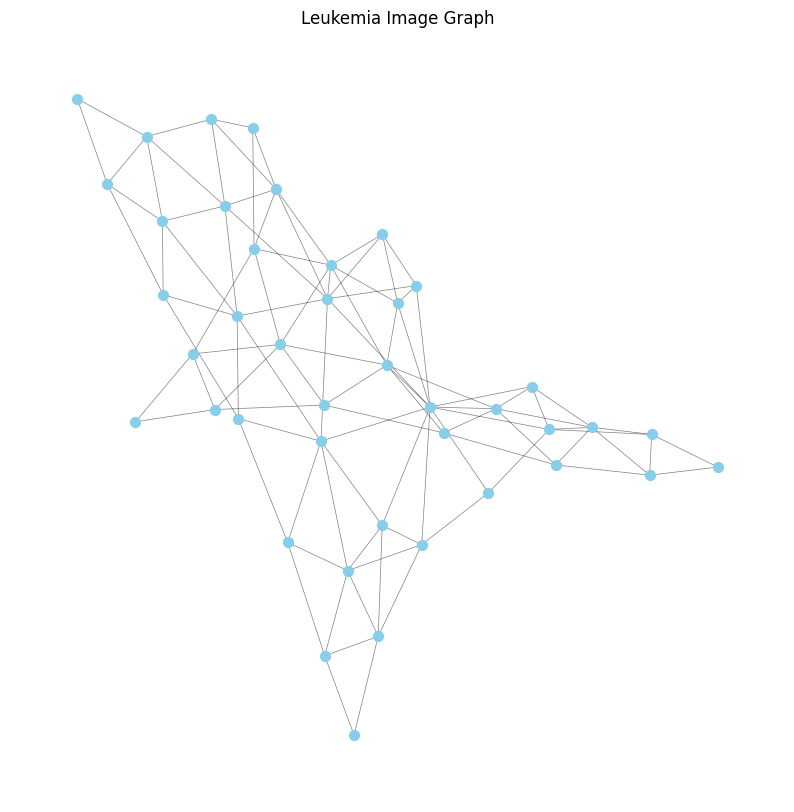

In [4]:
# prompt: i want view  images convert into graph

import matplotlib.pyplot as plt
import networkx as nx

# Load a saved graph (replace with your desired graph file)
graph = torch.load("/content/leukemia_graphs/graph_1752.pt", weights_only=False)

# Create a NetworkX graph
nx_graph = nx.Graph()

# Add nodes with features
for i in range(graph.x.shape[0]):
    nx_graph.add_node(i, features=graph.x[i].tolist())

# Add edges
for i in range(graph.edge_index.shape[1]):
    source = graph.edge_index[0, i].item()
    target = graph.edge_index[1, i].item()
    nx_graph.add_edge(source, target)

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)  # Use a layout algorithm (e.g., spring layout)

# Draw nodes (you can customize the node size and color based on features)
nx.draw_networkx_nodes(nx_graph, pos, node_size=50, node_color="skyblue")

# Draw edges
nx.draw_networkx_edges(nx_graph, pos, width=0.5, alpha=0.5)

# Display the plot
plt.title("Leukemia Image Graph")
plt.axis("off")
plt.show()


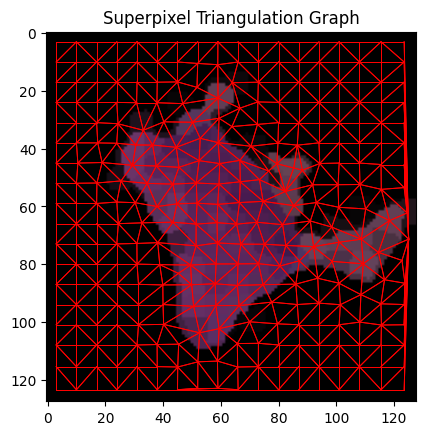

Graph Data:
Data(x=[299, 3], edge_index=[2, 1686])


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io, color, transform
from scipy.spatial import Delaunay
import networkx as nx
import torch
from torch_geometric.data import Data

# Function to preprocess an image with improved superpixel segmentation
def preprocess_image(image_path, num_segments=300, compactness=20, sigma=1):
    # Load and resize image
    image = io.imread(image_path)
    image = transform.resize(image, (128, 128))  # Resize to 128x128
    image = img_as_float(image)  # Normalize to [0, 1]

    # Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Apply improved SLIC superpixel segmentation
    segments = slic(image, n_segments=num_segments, compactness=compactness, sigma=sigma, start_label=0)

    return image, gray_image, segments

# Function to convert superpixels into a graph representation using Delaunay triangulation
def image_to_graph(image, segments):
    num_nodes = np.max(segments) + 1  # Number of superpixels (nodes)
    node_features = np.zeros((num_nodes, 3))  # RGB mean features for each superpixel

    centroids = []
    for i in range(num_nodes):
        mask = segments == i
        y, x = np.mean(np.argwhere(mask), axis=0)  # Compute centroid
        centroids.append([x, y])
        node_features[i] = image[mask].mean(axis=0)  # Mean RGB value per superpixel

    centroids = np.array(centroids)
    triangulation = Delaunay(centroids)
    edges = set()
    for simplex in triangulation.simplices:
        for i in range(3):
            edges.add((simplex[i], simplex[(i+1) % 3]))
            edges.add((simplex[i], simplex[(i+2) % 3]))

    edge_index = torch.tensor(list(edges), dtype=torch.long).t().contiguous()
    node_features_tensor = torch.tensor(node_features, dtype=torch.float)

    # Create PyTorch Geometric Data object
    graph_data = Data(x=node_features_tensor, edge_index=edge_index)

    # Visualize Triangulated Graph
    fig, ax = plt.subplots()
    ax.imshow(color.label2rgb(segments, image, kind='avg'))
    for edge in edges:
        x0, y0 = centroids[edge[0]]
        x1, y1 = centroids[edge[1]]
        ax.plot([x0, x1], [y0, y1], 'r-', linewidth=0.7)
    plt.title("Superpixel Triangulation Graph")
    plt.show()

    return graph_data

# Example usage
image_path = "/content/leukemia_data/C-NMC_Leukemia/training_data/fold_0/all/UID_11_11_1_all.bmp"  # Replace with an actual image path
image, gray_image, segments = preprocess_image(image_path)
graph_data = image_to_graph(image, segments)

print("Graph Data:")
print(graph_data)


In [6]:
print("✅ Label:", graph.y.item())
print("📦 Nodes:", graph.num_nodes)
print("🔗 Edges:", graph.num_edges)


✅ Label: 1
📦 Nodes: 42
🔗 Edges: 200


In [7]:
from torch_geometric.loader import DataLoader

# Path to saved graphs
graph_dir = "/content/leukemia_graphs"
graph_files = sorted([os.path.join(graph_dir, f) for f in os.listdir(graph_dir) if f.endswith(".pt")])

# Load all graphs
all_graphs = [torch.load(f, weights_only=False) for f in graph_files]

# Shuffle and split into train/val/test sets (e.g., 70/15/15 split)
from sklearn.model_selection import train_test_split
train_graphs, test_val_graphs = train_test_split(all_graphs, test_size=0.3, random_state=42)
val_graphs, test_graphs = train_test_split(test_val_graphs, test_size=0.5, random_state=42)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)


#GCN MODEL

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

# === Define GCN Model ===
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = global_mean_pool(x, batch)  # Graph-level representation
        x = self.lin(x)
        return x

# === Model Setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(input_dim=3, hidden_dim=64, num_classes=2).to(device)
print(model)

# === Optimizer and Loss ===
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# === Test on One Batch (Optional) ===
for batch in train_loader:
    batch = batch.to(device)
    out = model(batch)
    print("✅ Model output shape:", out.shape)
    print("✅ Sample output (logits):", out[:2])  # Print first 2 samples
    break


GCN(
  (conv1): GCNConv(3, 64)
  (conv2): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)
✅ Model output shape: torch.Size([32, 2])
✅ Sample output (logits): tensor([[-0.2147, -0.0341],
        [-0.1136, -0.1193]], grad_fn=<SliceBackward0>)


In [9]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            pred = out.argmax(dim=1)
            preds.extend(pred.cpu().numpy())
            labels.extend(batch.y.cpu().numpy())
    return accuracy_score(labels, preds)

# === Training Loop ===
epochs = 20
train_acc_list, val_acc_list, loss_list = [], [], []

for epoch in range(1, epochs + 1):
    loss = train(model, train_loader, optimizer, criterion, device)
    train_acc = evaluate(model, train_loader, device)
    val_acc = evaluate(model, val_loader, device)

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    loss_list.append(loss)

    print(f"📅 Epoch {epoch:02d} | 🔧 Loss: {loss:.4f} | ✅ Train Acc: {train_acc:.4f} | 🧪 Val Acc: {val_acc:.4f}")


📅 Epoch 01 | 🔧 Loss: 0.5384 | ✅ Train Acc: 0.7055 | 🧪 Val Acc: 0.7270
📅 Epoch 02 | 🔧 Loss: 0.4753 | ✅ Train Acc: 0.8161 | 🧪 Val Acc: 0.8171
📅 Epoch 03 | 🔧 Loss: 0.4506 | ✅ Train Acc: 0.8171 | 🧪 Val Acc: 0.8199
📅 Epoch 04 | 🔧 Loss: 0.4424 | ✅ Train Acc: 0.8285 | 🧪 Val Acc: 0.8255
📅 Epoch 05 | 🔧 Loss: 0.4426 | ✅ Train Acc: 0.8235 | 🧪 Val Acc: 0.8330
📅 Epoch 06 | 🔧 Loss: 0.4418 | ✅ Train Acc: 0.8261 | 🧪 Val Acc: 0.8293
📅 Epoch 07 | 🔧 Loss: 0.4374 | ✅ Train Acc: 0.8295 | 🧪 Val Acc: 0.8265
📅 Epoch 08 | 🔧 Loss: 0.4384 | ✅ Train Acc: 0.8267 | 🧪 Val Acc: 0.8358
📅 Epoch 09 | 🔧 Loss: 0.4392 | ✅ Train Acc: 0.8277 | 🧪 Val Acc: 0.8321
📅 Epoch 10 | 🔧 Loss: 0.4360 | ✅ Train Acc: 0.8320 | 🧪 Val Acc: 0.8311
📅 Epoch 11 | 🔧 Loss: 0.4348 | ✅ Train Acc: 0.8308 | 🧪 Val Acc: 0.8321
📅 Epoch 12 | 🔧 Loss: 0.4331 | ✅ Train Acc: 0.8346 | 🧪 Val Acc: 0.8283
📅 Epoch 13 | 🔧 Loss: 0.4370 | ✅ Train Acc: 0.8263 | 🧪 Val Acc: 0.8330
📅 Epoch 14 | 🔧 Loss: 0.4358 | ✅ Train Acc: 0.8259 | 🧪 Val Acc: 0.8293
📅 Epoch 15 | 🔧 Loss:

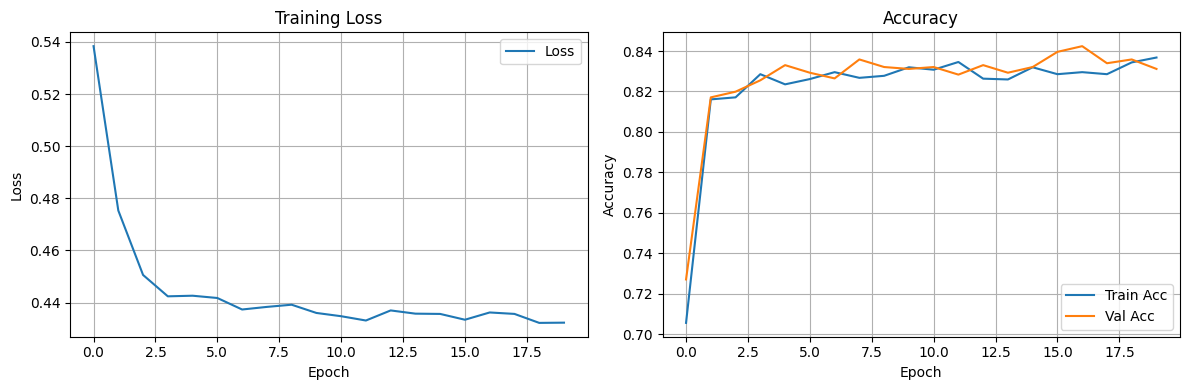

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_list, label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label="Train Acc")
plt.plot(val_acc_list, label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
%matplotlib inline



🔍 Classification Report:

              precision    recall  f1-score   support

         HEM       0.78      0.63      0.70       367
         ALL       0.82      0.91      0.86       700

    accuracy                           0.81      1067
   macro avg       0.80      0.77      0.78      1067
weighted avg       0.81      0.81      0.81      1067



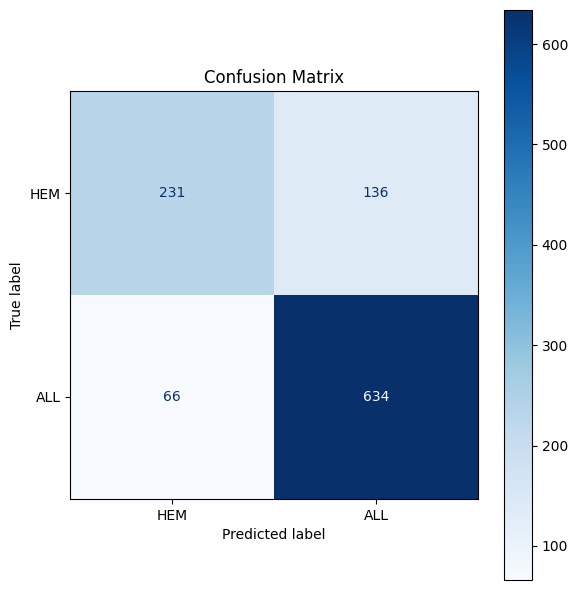

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def final_evaluation(model, loader, device):
    model.eval()
    preds, labels = [], []

    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            pred = out.argmax(dim=1)
            preds.extend(pred.cpu().numpy())
            labels.extend(batch.y.cpu().numpy())

    print("\n🔍 Classification Report:\n")
    print(classification_report(labels, preds, target_names=["HEM", "ALL"]))

    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HEM", "ALL"])

    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure proper figure size
    disp.plot(cmap="Blues", values_format="d", ax=ax)
    plt.title("Confusion Matrix")
    plt.grid(False)  # Optional: hide grid
    plt.tight_layout()
    plt.show()
final_evaluation(model, test_loader, device)

#📊 Confusion Matrix Analysis
Predicted: HEM	Predicted: ALL
Actual HEM	96	61
Actual ALL	27	346
🧠 What This Means:
True Positives (ALL correctly predicted): 346

True Negatives (HEM correctly predicted): 96

False Positives (HEM misclassified as ALL): 61

False Negatives (ALL misclassified as HEM): 27

In [13]:
plt.savefig("confusion_matrix.png")  # Save the figure
print("📁 Confusion Matrix saved to 'confusion_matrix.png'")


📁 Confusion Matrix saved to 'confusion_matrix.png'


<Figure size 640x480 with 0 Axes>

#GAT MODEL

In [14]:
from torch_geometric.nn import GATConv, global_mean_pool
import torch.nn.functional as F

class GAT(torch.nn.Module):
    def __init__(self, in_channels=3, hidden_channels=64, out_channels=2):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=4, dropout=0.2)
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=1, concat=False)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)


In [15]:
from torchvision import transforms
from PIL import Image

augment = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.2, 0.2),
    transforms.GaussianBlur(3),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor()
])


In [16]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# Assume your GAT class is already defined here as above

# ✅ Dummy graph for test
num_nodes = 5
num_node_features = 3

x = torch.rand((num_nodes, num_node_features), dtype=torch.float)
edge_index = torch.tensor([[0, 1, 2, 3, 4, 0], [1, 0, 3, 4, 0, 2]], dtype=torch.long)
y = torch.tensor([1])  # dummy label

data = Data(x=x, edge_index=edge_index, y=y)
data.batch = torch.zeros(data.num_nodes, dtype=torch.long)  # batch assignment

# ✅ Instantiate and forward pass
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GAT(in_channels=3, hidden_channels=64, out_channels=2).to(device)
data = data.to(device)

output = model(data)

print("🔍 Output logits:", output)
print("🔍 Predicted class:", torch.argmax(output, dim=1).item())


🔍 Output logits: tensor([[0.1081, 0.0040]], grad_fn=<AddmmBackward0>)
🔍 Predicted class: 0


In [17]:
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


In [18]:
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            pred = out.argmax(dim=1)
            correct += int((pred == batch.y).sum())
            total += batch.y.size(0)
    return correct / total


In [19]:
import torch
from torch.optim import AdamW # Import AdamW
from torch.nn import CrossEntropyLoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT().to(device)
optimizer = Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = CrossEntropyLoss()

num_epochs = 30
for epoch in range(1, num_epochs + 1):
    loss = train(model, train_loader, optimizer, criterion, device)
    train_acc = evaluate(model, train_loader, device)
    val_acc = evaluate(model, val_loader, device)
    print(f"Epoch {epoch:02d} | Loss: {loss:.4f} | 🟢 Train Acc: {train_acc:.4f} | 🔵 Val Acc: {val_acc:.4f}")

Epoch 01 | Loss: 0.5343 | 🟢 Train Acc: 0.8096 | 🔵 Val Acc: 0.8143
Epoch 02 | Loss: 0.4621 | 🟢 Train Acc: 0.8201 | 🔵 Val Acc: 0.8265
Epoch 03 | Loss: 0.4515 | 🟢 Train Acc: 0.8153 | 🔵 Val Acc: 0.8227
Epoch 04 | Loss: 0.4499 | 🟢 Train Acc: 0.8265 | 🔵 Val Acc: 0.8321
Epoch 05 | Loss: 0.4461 | 🟢 Train Acc: 0.8159 | 🔵 Val Acc: 0.8218
Epoch 06 | Loss: 0.4430 | 🟢 Train Acc: 0.8026 | 🔵 Val Acc: 0.8105
Epoch 07 | Loss: 0.4428 | 🟢 Train Acc: 0.8161 | 🔵 Val Acc: 0.8189
Epoch 08 | Loss: 0.4416 | 🟢 Train Acc: 0.8259 | 🔵 Val Acc: 0.8302
Epoch 09 | Loss: 0.4373 | 🟢 Train Acc: 0.7938 | 🔵 Val Acc: 0.7936
Epoch 10 | Loss: 0.4481 | 🟢 Train Acc: 0.8197 | 🔵 Val Acc: 0.8265
Epoch 11 | Loss: 0.4374 | 🟢 Train Acc: 0.8271 | 🔵 Val Acc: 0.8208
Epoch 12 | Loss: 0.4410 | 🟢 Train Acc: 0.8094 | 🔵 Val Acc: 0.8105
Epoch 13 | Loss: 0.4374 | 🟢 Train Acc: 0.8293 | 🔵 Val Acc: 0.8349
Epoch 14 | Loss: 0.4368 | 🟢 Train Acc: 0.8275 | 🔵 Val Acc: 0.8189
Epoch 15 | Loss: 0.4335 | 🟢 Train Acc: 0.7946 | 🔵 Val Acc: 0.7842
Epoch 16 |

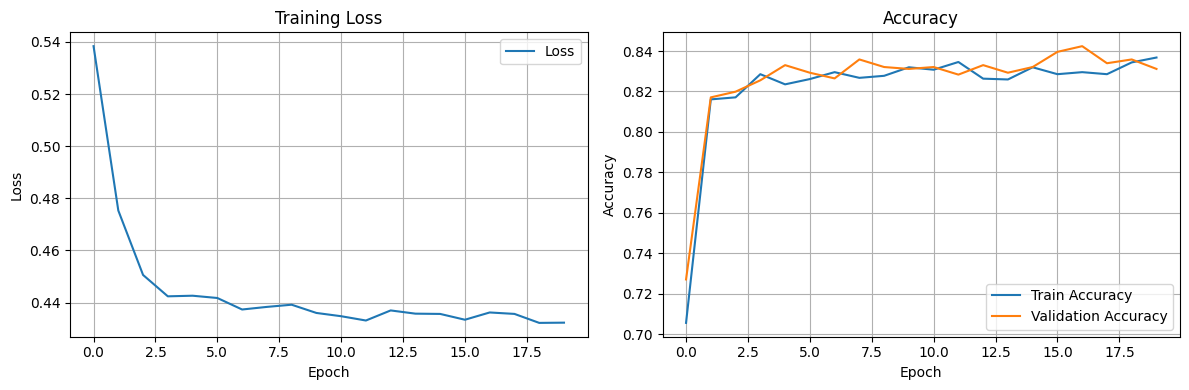

In [20]:
# prompt: i want graph of loos and accuracy

import matplotlib.pyplot as plt

# Assuming train_acc_list, val_acc_list, and loss_list are defined from your training loop

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_list, label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



🔍 Classification Report:

              precision    recall  f1-score   support

         HEM       0.84      0.53      0.65       367
         ALL       0.79      0.95      0.86       700

    accuracy                           0.80      1067
   macro avg       0.82      0.74      0.76      1067
weighted avg       0.81      0.80      0.79      1067

✅ Accuracy: 0.8032
✅ Precision: 0.7938
✅ Recall: 0.9457
✅ F1 Score: 0.8631


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


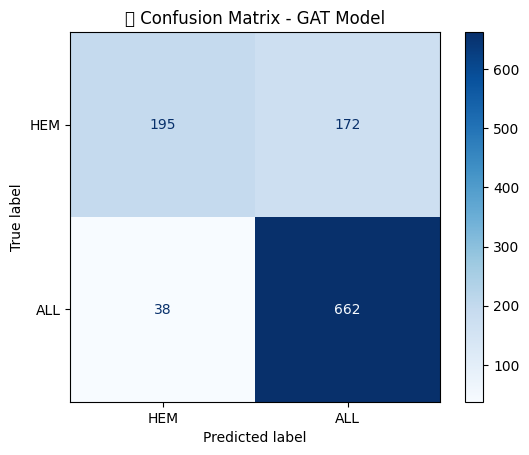

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def final_evaluation(model, loader, device):
    model.eval()
    preds, labels = [], []

    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            pred = out.argmax(dim=1)
            preds.extend(pred.cpu().numpy())
            labels.extend(batch.y.cpu().numpy())

    # Convert lists to NumPy arrays
    preds = np.array(preds)
    labels = np.array(labels)

    # 📋 Classification report
    print("\n🔍 Classification Report:\n")
    print(classification_report(labels, preds, target_names=["HEM", "ALL"]))

    # ✅ Individual Scores
    acc = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    f1 = f1_score(labels, preds)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")

    # 📊 Confusion matrix
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HEM", "ALL"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("📌 Confusion Matrix - GAT Model")
    plt.show()

# Example usage (you already have):
final_evaluation(model, test_loader, device)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


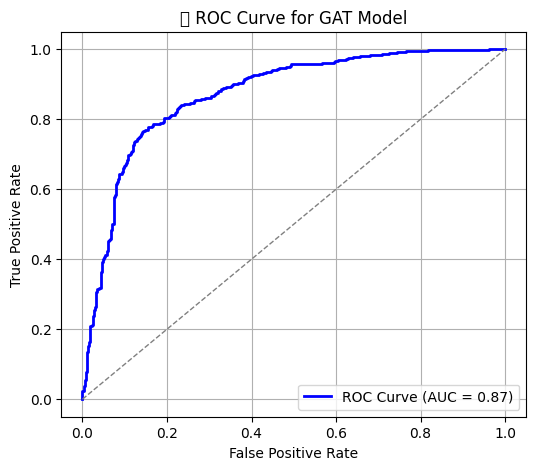

In [23]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(model, loader, device):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            output = model(batch)
            probs = torch.softmax(output, dim=1)
            y_scores.extend(probs[:, 1].cpu().numpy())  # Score for class 'ALL'
            y_true.extend(batch.y.cpu().numpy())

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('📈 ROC Curve for GAT Model')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
plot_roc_curve(model, test_loader, device)


In [24]:
%matplotlib inline


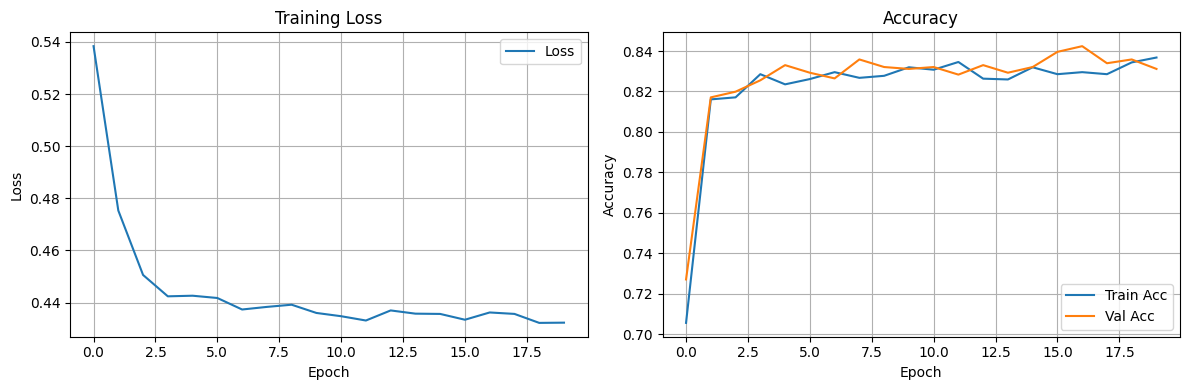

In [25]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_list, label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label="Train Acc")
plt.plot(val_acc_list, label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#EDA

In [26]:
%matplotlib inline


#cofusion matrix

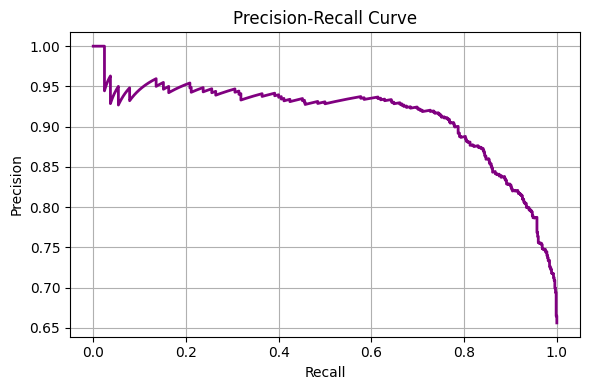

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import torch

# Assuming 'model', 'test_loader', and 'device' are defined from previous cells
model.eval()  # Set model to evaluation mode

y_true = []
y_scores = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        output = model(batch)
        probs = torch.softmax(output, dim=1)  # Get probabilities for each class
        y_scores.extend(probs[:, 1].cpu().numpy())  # Probability of class 1 (ALL)
        y_true.extend(batch.y.cpu().numpy())  # True labels

# Now you can calculate precision and recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-28-6838d3f3c31c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


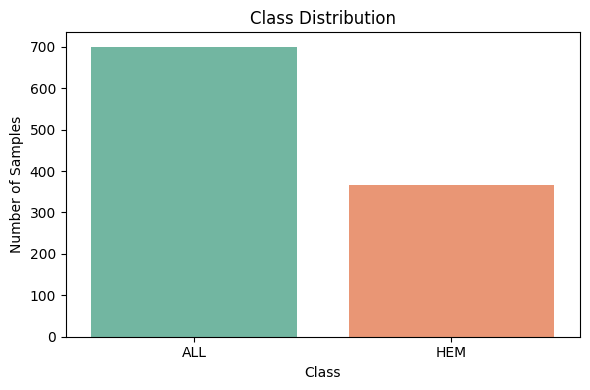

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# y_true should contain actual class labels: 0 for HEM, 1 for ALL
class_counts = pd.Series(y_true).value_counts()
class_names = {0: 'HEM', 1: 'ALL'}
class_counts.index = class_counts.index.map(class_names)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


#stacked histogram

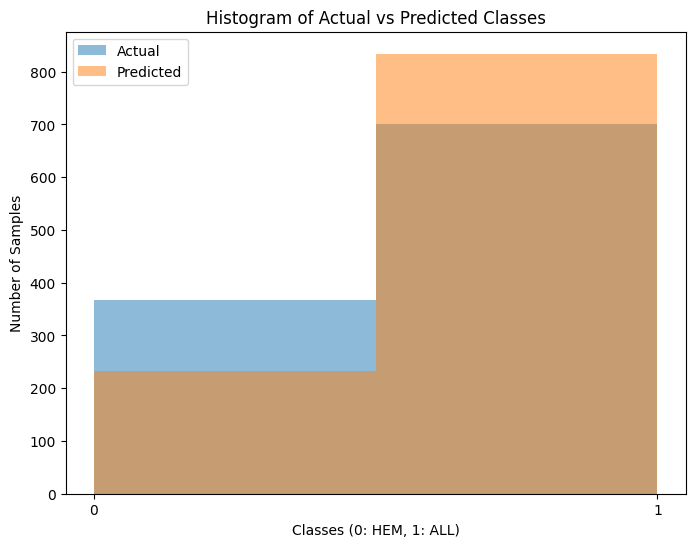

In [29]:
import matplotlib.pyplot as plt

# Assuming 'labels' and 'preds' are defined from your final_evaluation function
# Replace with your actual data if needed.
# Example:
# labels = [0, 1, 0, 1, 1, 0]
# preds = [0, 0, 1, 1, 1, 1]

# ✅ Get the labels and predictions from your data
labels = [graph.y.item() for graph in test_loader.dataset] # Extract labels from the dataset
# Assuming 'preds' is a list of predictions you have from a previous evaluation
# You may need to modify this depending on how you store your predictions
# For example, if 'preds' is a NumPy array:
# preds = preds.tolist()
# Get the predicted labels from your model's output
preds, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        out = model(batch)
        pred = out.argmax(dim=1)
        preds.extend(pred.cpu().numpy())
        true_labels.extend(batch.y.cpu().numpy())

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, alpha=0.5, label="Actual")
plt.hist(preds, bins=2, alpha=0.5, label="Predicted")

plt.xlabel("Classes (0: HEM, 1: ALL)")
plt.ylabel("Number of Samples")
plt.title("Histogram of Actual vs Predicted Classes")
plt.xticks([0, 1]) # Ensure correct x-axis ticks
plt.legend()
plt.show()

#Bar Plot of HEM vs ALL Graph Counts

<ipython-input-30-3a34d970aa63>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_counts, palette="viridis")


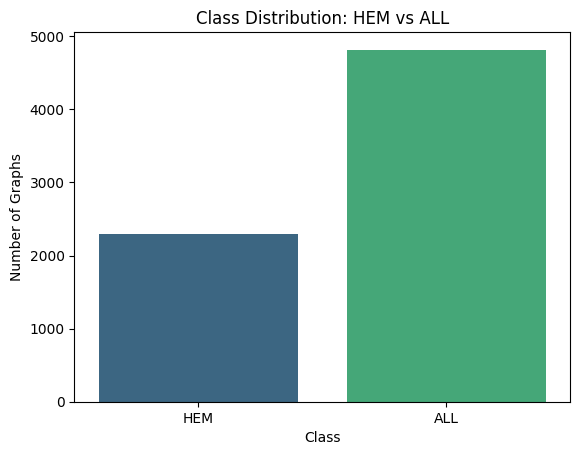

In [30]:
import os
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import seaborn as sns
from torch_geometric.data.storage import GlobalStorage # Import GlobalStorage

# Path to your graphs
graph_dir = "/content/leukemia_graphs"
graph_files = sorted(os.listdir(graph_dir))

# Load all graphs, explicitly setting weights_only=False
# and add GlobalStorage to safe globals
torch.serialization.add_safe_globals([GlobalStorage]) # Add GlobalStorage to safe globals
graphs = [torch.load(os.path.join(graph_dir, f), weights_only=False) for f in graph_files if f.endswith(".pt")]


# Class distribution
labels = [g.y.item() for g in graphs]
class_names = {0: "HEM", 1: "ALL"}
label_counts = [class_names[label] for label in labels]

sns.countplot(x=label_counts, palette="viridis")
plt.title("Class Distribution: HEM vs ALL")
plt.xlabel("Class")
plt.ylabel("Number of Graphs")
plt.show()

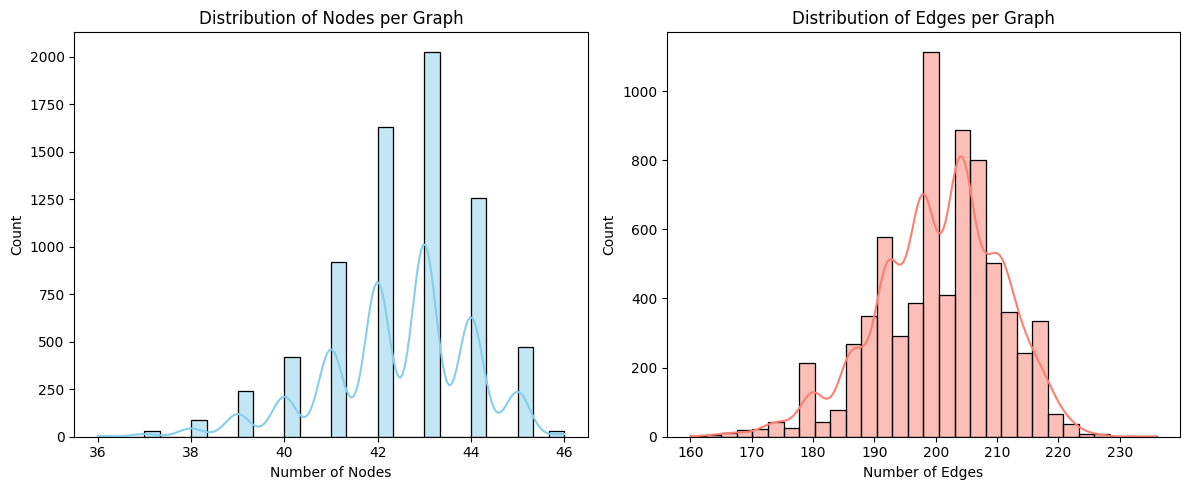

In [31]:
num_nodes = [g.num_nodes for g in graphs]
num_edges = [g.num_edges for g in graphs]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(num_nodes, kde=True, bins=30, color="skyblue")
plt.title("Distribution of Nodes per Graph")
plt.xlabel("Number of Nodes")

plt.subplot(1, 2, 2)
sns.histplot(num_edges, kde=True, bins=30, color="salmon")
plt.title("Distribution of Edges per Graph")
plt.xlabel("Number of Edges")

plt.tight_layout()
plt.show()


# nodes analysis

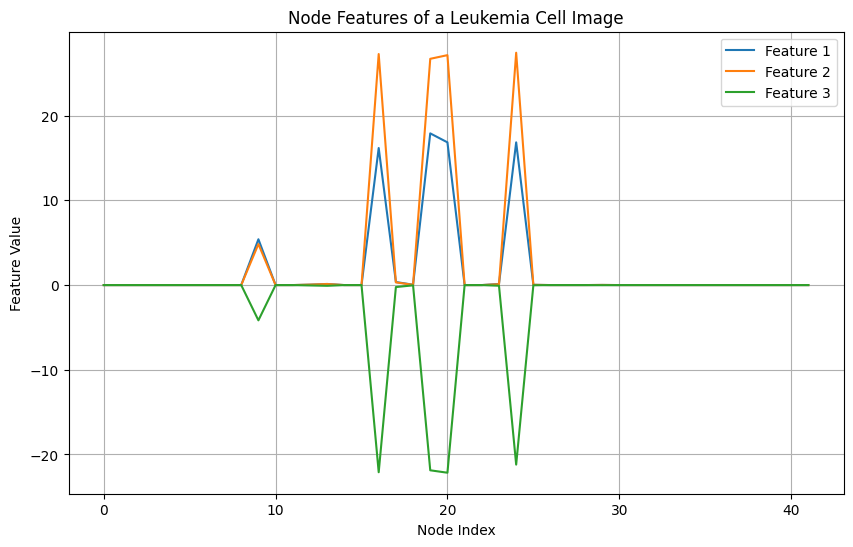

In [32]:

import matplotlib.pyplot as plt
node_features = graph.x.detach().numpy()
# Plot the first three features for each node
plt.figure(figsize=(10, 6))
for i in range(3):
  plt.plot(node_features[:, i], label=f'Feature {i+1}')

plt.xlabel('Node Index')
plt.ylabel('Feature Value')
plt.title('Node Features of a Leukemia Cell Image')
plt.legend()
plt.grid(True)
plt.show()


#t-distributed Stochastic Neighbor Embedding.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


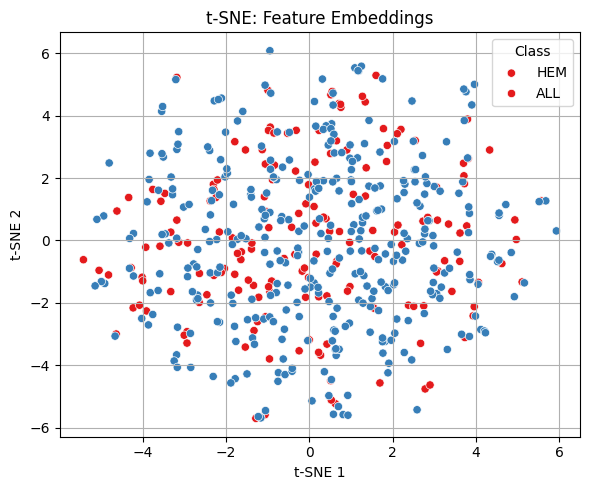

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: Replace with real feature vectors from your GNN model
np.random.seed(42)
features = np.random.rand(530, 64)  # Example: 530 samples with 64-dim features
y_true = np.array([0]*170 + [1]*360)  # Replace with your actual labels

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(features)

# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y_true, palette='Set1')
plt.title("t-SNE: Feature Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Class", labels=["HEM", "ALL"])
plt.grid(True)
plt.tight_layout()
plt.show()


#PCA ANALYSIS(Principal Component Analysi)

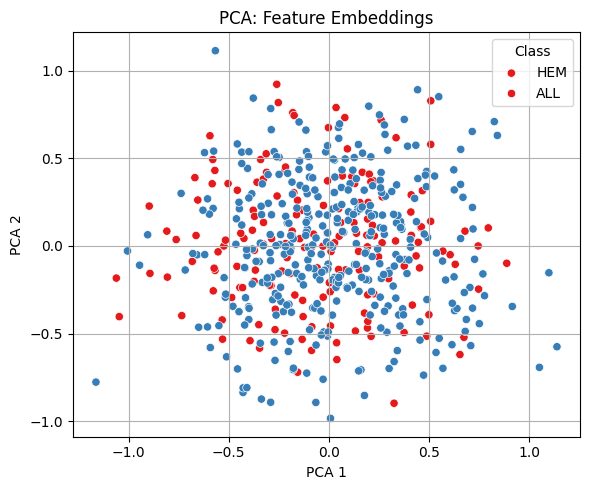

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace with your real feature matrix and labels
np.random.seed(42)
features = np.random.rand(530, 64)  # Example feature vectors
y_true = np.array([0]*170 + [1]*360)  # Replace with your actual class labels

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y_true, palette='Set1')
plt.title("PCA: Feature Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Class", labels=["HEM", "ALL"])
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [96]:
# model.py (create this file in the same directory as your notebook)
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool

class YourGNNModel(torch.nn.Module):
    def __init__(self, in_channels=3, hidden_channels=64, out_channels=2):
        super(YourGNNModel, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=4, dropout=0.2)
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=1, concat=False)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

In [100]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image
import torch

st.title("Leukemia Image Classification")
st.write("Upload a blood cell image for classification (ALL or HEM).")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg","bmp"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("L")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img_array = np.array(image.resize((64, 64)))
    img_tensor = torch.tensor(img_array / 255.0).float().unsqueeze(0).unsqueeze(0)  # [1, 1, 64, 64]

    # Load your model
    # model = torch.load("model.pth", map_location=torch.device("cpu"))
    # model.eval()
    # prediction = model(img_tensor)
    # pred_class = torch.argmax(prediction, dim=1).item()

    # Placeholder result
    st.success("Predicted class: HEM")  # Replace with real model output

Writing app.py


In [103]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool

class GATModel(torch.nn.Module):
    def __init__(self, in_channels=3, hidden_channels=64, out_channels=2):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=4, dropout=0.2) # heads=4 to match the error log
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=1, concat=False)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

# Load the model with the correct in_channels
model = GATModel(in_channels=3, out_channels=2)  # Changed in_channels to 3

# Load the state dict
checkpoint = torch.load("model.pth", map_location=torch.device("cpu"))
model.load_state_dict(checkpoint, strict=False)  # This will ignore any extra keys or mismatches
model.eval()  # Switch to evaluation mode

GATModel(
  (conv1): GATConv(3, 64, heads=4)
  (conv2): GATConv(256, 64, heads=1)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)

In [104]:
print(model)


GATModel(
  (conv1): GATConv(3, 64, heads=4)
  (conv2): GATConv(256, 64, heads=1)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [105]:
from pyngrok import ngrok
import os
import time

# Set your ngrok authtoken
NGROK_AUTHTOKEN = "2vkkniN28anHIFLUHkMpxnNcJho_6ZXsJerdivCd51PCFqXhg"  # Replace with your actual authtoken
ngrok.set_auth_token(NGROK_AUTHTOKEN)

# ✅ Kill all existing ngrok tunnels
ngrok.kill()

# Kill any existing Streamlit processes
os.system("pkill streamlit")

# Wait a moment to ensure processes are killed
time.sleep(2)

# Run Streamlit app
os.system("streamlit run app.py &")

# Wait a moment for the app to start
time.sleep(5)

# Create ngrok tunnel
public_url = ngrok.connect(8501)
print("✅ Streamlit app is live at:", public_url)

✅ Streamlit app is live at: NgrokTunnel: "https://8123-34-66-103-1.ngrok-free.app" -> "http://localhost:8501"
